In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func,inspect

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base=automap_base()
Base.prepare(engine,reflect=True)

# reflect the tables

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
inspector=inspect(engine)

In [9]:
inspector.get_table_names()

['measurement', 'station']

In [10]:
# Save references to each table
Measurement=Base.classes.measurement
Station=Base.classes.station

In [11]:
# Create our session (link) from Python to the DB
session=Session(engine)

In [12]:
columns=inspector.get_columns('measurement')
for column in columns:
    print(column['name'],column['type'])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [13]:
engine.execute('select * from measurement limit 10 ').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0),
 (6, 'USC00519397', '2010-01-07', 0.06, 70.0),
 (7, 'USC00519397', '2010-01-08', 0.0, 64.0),
 (8, 'USC00519397', '2010-01-09', 0.0, 68.0),
 (9, 'USC00519397', '2010-01-10', 0.0, 73.0),
 (10, 'USC00519397', '2010-01-11', 0.01, 64.0)]

In [14]:
column2=inspector.get_columns('station')
for col in column2:
    print(col['name'],col['type'])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [15]:
engine.execute('select * from station limit 10').fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6),
 (6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5),
 (7, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9),
 (8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9),
 (9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)]

# Exploratory Climate Analysis

In [16]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
latest_date=session.query(Measurement.date).order_by(Measurement.date.desc()).first()
latest_date

('2017-08-23')

In [17]:
# Calculate the date 1 year ago from the last data point in the database
last_year=dt.date(2017,8,23)-dt.timedelta(days=365)
last_year

datetime.date(2016, 8, 23)

In [18]:
# Perform a query to retrieve the data and precipitation scores
data_one=session.query(Measurement.date,Measurement.prcp).\
    filter(Measurement.date>='2016-08-23').\
    order_by(Measurement.date).all()
data_one

[('2016-08-23', 0.0),
 ('2016-08-23', 0.15),
 ('2016-08-23', 0.05),
 ('2016-08-23', None),
 ('2016-08-23', 0.02),
 ('2016-08-23', 1.79),
 ('2016-08-23', 0.7),
 ('2016-08-24', 0.08),
 ('2016-08-24', 2.15),
 ('2016-08-24', 2.28),
 ('2016-08-24', None),
 ('2016-08-24', 1.22),
 ('2016-08-24', 2.15),
 ('2016-08-24', 1.45),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.21),
 ('2016-08-25', 0.06),
 ('2016-08-25', 0.11),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.03),
 ('2016-08-26', 0.02),
 ('2016-08-26', 0.04),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.01),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.18),
 ('2016-08-27', 0.02),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.12),
 ('2016-08-27', None),
 ('2016-08-28', 0.01),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.6),
 ('2016-08-28', 2.07),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.17),
 ('2016-08-29', 0.04),
 ('2016-08-29', None),
 ('2016-08-29', 0.0),

In [19]:
# Save the query results as a Pandas DataFrame and set the index to the date column
df=pd.DataFrame(data_one,columns=['date','precipitation'])
#columns=['date','prcp']
df.set_index('date',inplace=True)
dataframe_one=df.sort_values(['date'],ascending=True)
print(dataframe_one)

            precipitation
date                     
2016-08-23           0.00
2016-08-23           0.15
2016-08-23           0.05
2016-08-23            NaN
2016-08-23           0.02
...                   ...
2017-08-22           0.50
2017-08-23           0.08
2017-08-23           0.00
2017-08-23           0.00
2017-08-23           0.45

[2230 rows x 1 columns]


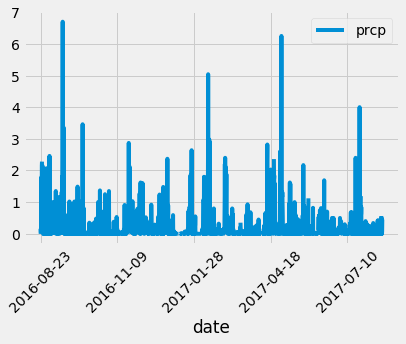

In [23]:
prcp_df = pd.DataFrame(data_one)
prcp_df
updated_df = prcp_df.set_index(prcp_df["date"])
updated_df = updated_df.sort_index()
updated_df.plot(rot=45)

Text(0, 0.5, 'inches')

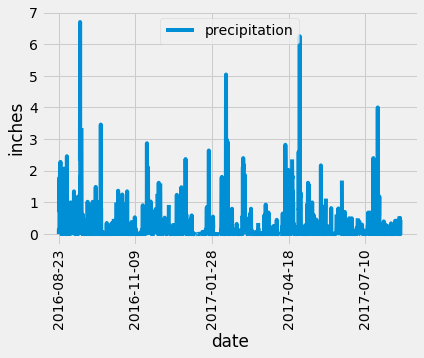

In [24]:
dataframe_one.plot(rot=90)
plt.xlabel('date')
plt.ylabel('inches')

In [25]:
# Use Pandas to calcualte the summary statistics for the precipitation data
dataframe_one.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [26]:
#pr_df=pd.DataFrame(data_one,columns=['date','precipitation'])
#pr_df

In [27]:
# Design a query to show how many stations are available in this dataset?
station_count=session.query(Station.station).count()
print(station_count)


9


In [28]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.

session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).\
order_by(func.count(Measurement.station).desc()).all()


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [29]:
#Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
active_station=session.query(Measurement.station,\
                             func.count(Measurement.station),\
                             Measurement.tobs).group_by(Measurement.station).\
order_by(func.count(Measurement.station).desc()).all()
print(active_station)

[('USC00519281', 2772, 70.0), ('USC00519397', 2724, 65.0), ('USC00513117', 2709, 67.0), ('USC00519523', 2669, 75.0), ('USC00516128', 2612, 73.0), ('USC00514830', 2202, 67.0), ('USC00511918', 1979, 66.0), ('USC00517948', 1372, 75.0), ('USC00518838', 511, 72.0)]


In [30]:
session.query(Measurement.station,\
              func.count(Measurement.station),\
              func.max(Measurement.tobs),\
              func.min(Measurement.tobs),\
              func.avg(Measurement.tobs)).\
group_by(Measurement.station).\
order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772, 85.0, 54.0, 71.66378066378067),
 ('USC00519397', 2724, 87.0, 56.0, 74.55323054331865),
 ('USC00513117', 2709, 85.0, 59.0, 72.68918420081211),
 ('USC00519523', 2669, 85.0, 56.0, 74.5436493068565),
 ('USC00516128', 2612, 84.0, 58.0, 70.91500765696784),
 ('USC00514830', 2202, 85.0, 58.0, 74.8732970027248),
 ('USC00511918', 1979, 87.0, 53.0, 71.61596766043456),
 ('USC00517948', 1372, 87.0, 58.0, 74.68440233236151),
 ('USC00518838', 511, 83.0, 58.0, 72.72407045009784)]

In [31]:
## Choose the station with the highest number of temperature observations.
sel=[Measurement.station,
     func.count(Measurement.station),
     func.max(Measurement.tobs),
     func.min(Measurement.tobs),
     func.avg(Measurement.tobs)]
highest_temp=session.query(*sel).\
group_by(Measurement.station).\
order_by(func.count(Measurement.station).desc()).first()

print(highest_temp)

('USC00519281', 2772, 85.0, 54.0, 71.66378066378067)


In [32]:
# Query the last 12 months of temperature observation data for this station.
data_two=session.query(Measurement.date,Measurement.station,Measurement.tobs).\
    filter(Measurement.date>='2016-08-23').\
    filter(Measurement.station=='USC00519281').\
    order_by(Measurement.date).all()
data_two


[('2016-08-23', 'USC00519281', 77.0),
 ('2016-08-24', 'USC00519281', 77.0),
 ('2016-08-25', 'USC00519281', 80.0),
 ('2016-08-26', 'USC00519281', 80.0),
 ('2016-08-27', 'USC00519281', 75.0),
 ('2016-08-28', 'USC00519281', 73.0),
 ('2016-08-29', 'USC00519281', 78.0),
 ('2016-08-30', 'USC00519281', 77.0),
 ('2016-08-31', 'USC00519281', 78.0),
 ('2016-09-01', 'USC00519281', 80.0),
 ('2016-09-02', 'USC00519281', 80.0),
 ('2016-09-03', 'USC00519281', 78.0),
 ('2016-09-04', 'USC00519281', 78.0),
 ('2016-09-05', 'USC00519281', 78.0),
 ('2016-09-06', 'USC00519281', 73.0),
 ('2016-09-07', 'USC00519281', 74.0),
 ('2016-09-08', 'USC00519281', 80.0),
 ('2016-09-09', 'USC00519281', 79.0),
 ('2016-09-10', 'USC00519281', 77.0),
 ('2016-09-11', 'USC00519281', 80.0),
 ('2016-09-12', 'USC00519281', 76.0),
 ('2016-09-13', 'USC00519281', 79.0),
 ('2016-09-14', 'USC00519281', 75.0),
 ('2016-09-15', 'USC00519281', 79.0),
 ('2016-09-16', 'USC00519281', 78.0),
 ('2016-09-17', 'USC00519281', 79.0),
 ('2016-09-1

In [33]:
df_data_two=pd.DataFrame(data_two,columns=['date','station','temporature'])
df_data_two

,date,station,temporature
0,2016-08-23,USC00519281,77.0
1,2016-08-24,USC00519281,77.0
2,2016-08-25,USC00519281,80.0
3,2016-08-26,USC00519281,80.0
4,2016-08-27,USC00519281,75.0
...,...,...,...
347,2017-08-14,USC00519281,77.0
348,2017-08-15,USC00519281,77.0
349,2017-08-16,USC00519281,76.0
350,2017-08-17,USC00519281,76.0


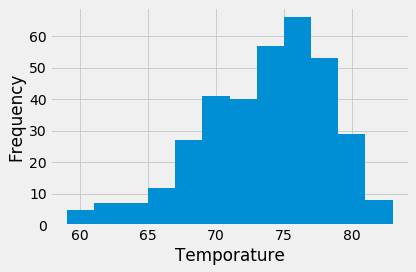

In [34]:
# plot the results as a histogram
plt.hist(df_data_two['temporature'],alpha=1,bins=12);

plt.xlabel('Temporature')
plt.ylabel('Frequency')


plt.tight_layout()


## Bonus Challenge Assignment

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
